In [30]:
#Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

#API key
from api_keys import api_key

#api_key = "1bd1d2672d9da67ea2d402ad240e8e5d"

#Determine city based on latitude and longitude
from citipy import citipy

#Output File (csv)
output_data_file = "output_data/cities.csv"

#Range lat & lon
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'api_keys'

In [24]:
#Lists of holding
lat_lngs = []
cities = []

#Create random combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#Identify nearest city
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #Is the city is uniqu? Add to 'cities list'
    if city not in cities:
        cities.append(city)

#Print city count
len(cities)

NameError: name 'citipy' is not defined

In [23]:
#Build query URL
url="http://api.openweathermap.org/data/2.5/weather?"

query_url=url+"appid="+api_key+"&units=imperial"+"&q=" #+city

In [10]:
#Create row counter
counter=0
set_num=1
clouds = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []
city_list=[]
print("Beginning Data Retrieval")
print("-"*30)

for city in cities:
    try:
        response=requests.get(query_url+city).json()
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        #update 
        if counter>=49:
            counter=1
            set_num+=1
            city_list.append(city)
        else:
            counter+=1
            city_list.append(city)
        print(f"Processing Record {counter} of Set {set_num} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

Beginning Data Retrieval
------------------------------
------------------------------
Data Retrieval Complete
------------------------------


In [13]:
#Create dictionary 
cities_dict={"City":city_list,
             "Cloudiness":clouds,
             "Country":country,
             "Date":date,
             "Humidity":humidity,
             "Latitude":latitude,
             "Longitude":longitude,
             "Max Temp":max_temp,
             "Wind Speed":wind_speed}

In [12]:
#Dictionary -> dataframe
cities_df=pd.DataFrame(cities_dict)
cities_df.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Latitude      0
Longitude     0
Max Temp      0
Wind Speed    0
dtype: int64

In [14]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


In [15]:
#Output data -> csv
cities_df.to_csv("city_weather.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Png/Lat vs Max Temp.png'

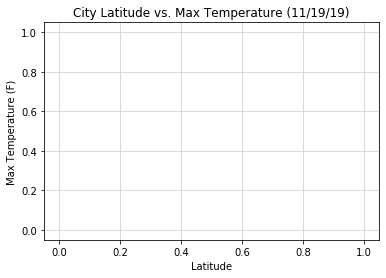

In [16]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temp"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Max Temperature (11/19/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Png/Lat vs Max Temp.png")

FileNotFoundError: [Errno 2] No such file or directory: 'Png/Lat vs Humidity.png'

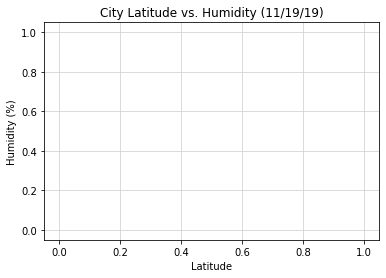

In [17]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Humidity (11/19/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Png/Lat vs Humidity.png")

FileNotFoundError: [Errno 2] No such file or directory: 'Png/Lat vs Cloudiness.png'

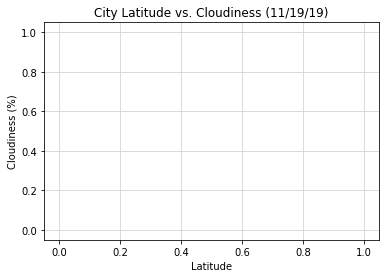

In [18]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Cloudiness (11/19/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Png/Lat vs Cloudiness.png")

FileNotFoundError: [Errno 2] No such file or directory: 'Png/Lat vs Wind Speed.png'

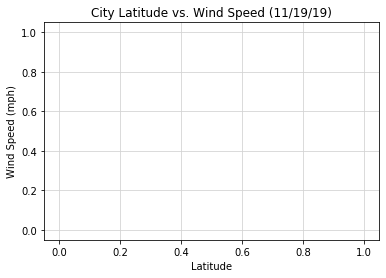

In [19]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Wind Speed (11/19/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Png/Lat vs Wind Speed.png")